In [144]:
import os
import numpy as np
import pandas as pd
import tqdm
import time
from sklearn.metrics import confusion_matrix

import torch
from torch.utils.data import DataLoader

from Datasets import FMAWav
from Transformations import CenterCrop, Compose
from Utils import show_validation

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
models_root = 'models'
models = sorted([os.path.join(models_root, model_path) for model_path in os.listdir(models_root) if model_path.startswith('restorchism24_medium_weighted')])

In [145]:
transformations = Compose([
    CenterCrop(size=10e3)
])

data_val = FMAWav('medium', 'validation', transform=transformations)

In [5]:
loader_val = DataLoader(data_val, batch_size=48, num_workers=4)

In [6]:
def model_eval(model_path, data_loader):
    model = torch.load(model_path)
    
    print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-', flush=True)
    print(f'Model: {model_path}', flush=True)
    with torch.no_grad():
        y_true = np.array([])
        y_pred = np.array([])
        for X, y in tqdm.tqdm(data_loader):
            preds = model(X.to(device)).argmax(axis=-1).cpu().numpy()
            y_true = np.concatenate((y_true, y.cpu().numpy()))
            y_pred = np.concatenate((y_pred, preds))
    
    del model
    torch.cuda.empty_cache()
    return y_true, y_pred

In [7]:
model_evals = {
    model_path: model_eval(model_path, loader_val) for model_path in models
}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_00_2020-09-01.pt


100%|██████████| 36/36 [01:24<00:00,  2.35s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_01_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_02_2020-09-01.pt


100%|██████████| 36/36 [01:24<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_03_2020-09-01.pt


100%|██████████| 36/36 [01:24<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_04_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_05_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_06_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_07_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_08_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_09_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_100_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_10_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_11_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_12_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_13_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_14_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_15_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_16_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_17_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_18_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_19_2020-09-01.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_20_2020-09-02.pt


100%|██████████| 36/36 [01:24<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_21_2020-09-02.pt


100%|██████████| 36/36 [01:24<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_22_2020-09-02.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_23_2020-09-02.pt


100%|██████████| 36/36 [01:24<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_24_2020-09-02.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_25_2020-09-03.pt


100%|██████████| 36/36 [01:24<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_26_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_27_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_28_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_29_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_30_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_31_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_32_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_33_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_34_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_35_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_36_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_37_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_38_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_39_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_40_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_41_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_42_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_43_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_44_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_45_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_46_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_47_2020-09-03.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_48_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_49_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_50_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_51_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_52_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_53_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_54_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_55_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_56_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_57_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_58_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_59_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_60_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_61_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_62_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.36s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_63_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_64_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_65_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_66_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_67_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_68_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_69_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_70_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_71_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_72_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_73_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_74_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.38s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_75_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_76_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_77_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_78_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_79_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_80_2020-09-04.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_81_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_82_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_83_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_84_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_85_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_86_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_87_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_88_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_89_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_90_2020-09-05.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_91_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_92_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_93_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_94_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_95_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_96_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_97_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_98_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Model: models/restorchism24_medium_weighted_99_2020-09-06.pt


100%|██████████| 36/36 [01:25<00:00,  2.37s/it]


In [8]:
model_evals

{'models/restorchism24_medium_weighted_00_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_01_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_02_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_03_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_04_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_05_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_06_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4.,

In [48]:
evals = {int(key.split('_')[3]): tt[key] for key in model_evals.keys()}

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre            Precision             Recall
0                 Blues                  nan                0.0
1             Classical                  nan                0.0
2               Country                  nan                0.0
3        Easy Listening                  nan                0.0
4            Electronic  0.31109799291617474  0.992467043314501
5          Experimental                  nan                0.0
6                  Folk                  nan                0.0
7               Hip-Hop                  0.0                0.0
8          Instrumental                  nan                0.0
9         International                  nan                0.0
10                 Jazz                  nan                0.0
11  Old-Time / Historic                  nan                0.0
12                  Pop                  nan                0.0
13                 Rock                  0.0                0.0
14             Soul-RnB                  nan                0.0
15               Spoken                  nan                0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre             Precision               Recall
0                 Blues                   nan                  0.0
1             Classical                   nan                  0.0
2               Country                   nan                  0.0
3        Easy Listening                   nan                  0.0
4            Electronic   0.32189973614775724   0.9190207156308852
5          Experimental                   nan                  0.0
6                  Folk                   nan                  0.0
7               Hip-Hop                   nan                  0.0
8          Instrumental  0.010638297872340425  0.06451612903225806
9         International                   nan                  0.0
10                 Jazz                   nan                  0.0
11  Old-Time / Historic                   nan                  0.0
12                  Pop                   nan                  0.0
13                 Rock                   nan                  0.0
14             Soul-RnB                   nan                  0.0
15               Spoken                   nan                  0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre           Precision               Recall
0                 Blues                 nan                  0.0
1             Classical                 nan                  0.0
2               Country                 0.0                  0.0
3        Easy Listening                 nan                  0.0
4            Electronic  0.3485714285714286   0.9190207156308852
5          Experimental                 nan                  0.0
6                  Folk                 nan                  0.0
7               Hip-Hop                 nan                  0.0
8          Instrumental                 nan                  0.0
9         International                 nan                  0.0
10                 Jazz                 nan                  0.0
11  Old-Time / Historic                 nan                  0.0
12                  Pop                 nan                  0.0
13                 Rock  0.7549668874172185  0.37315875613747956
14             Soul-RnB                 nan                  0.0
15               Spoken                 nan                  0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre            Precision               Recall
0                 Blues                  nan                  0.0
1             Classical  0.03614457831325301  0.04838709677419355
2               Country                  nan                  0.0
3        Easy Listening                  nan                  0.0
4            Electronic  0.38773747841105355   0.8455743879472694
5          Experimental                 0.05                0.008
6                  Folk                  nan                  0.0
7               Hip-Hop                  0.0                  0.0
8          Instrumental                  nan                  0.0
9         International                  nan                  0.0
10                 Jazz                  nan                  0.0
11  Old-Time / Historic   0.6666666666666666   0.0392156862745098
12                  Pop                  nan                  0.0
13                 Rock   0.6993166287015945    0.502454991816694
14             Soul-RnB                  nan                  0.0
15               Spoken                  nan                  0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre             Precision              Recall
0                 Blues                   nan                 0.0
1             Classical   0.08943089430894309  0.1774193548387097
2               Country                   0.0                 0.0
3        Easy Listening                   nan                 0.0
4            Electronic   0.40264650283553877  0.8022598870056498
5          Experimental  0.047244094488188976               0.048
6                  Folk                   nan                 0.0
7               Hip-Hop                   nan                 0.0
8          Instrumental                   nan                 0.0
9         International                   nan                 0.0
10                 Jazz                   nan                 0.0
11  Old-Time / Historic                   1.0  0.0392156862745098
12                  Pop                   nan                 0.0
13                 Rock    0.7430025445292621  0.4779050736497545
14             Soul-RnB                   nan                 0.0
15               Spoken                   nan                 0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre            Precision                Recall
0                 Blues                  nan                   0.0
1             Classical  0.10679611650485436    0.1774193548387097
2               Country                  nan                   0.0
3        Easy Listening                  nan                   0.0
4            Electronic  0.41275797373358347    0.8286252354048964
5          Experimental  0.05309734513274336                 0.048
6                  Folk                  nan                   0.0
7               Hip-Hop   0.3333333333333333  0.008333333333333333
8          Instrumental                  0.0                   0.0
9         International                  nan                   0.0
10                 Jazz                  nan                   0.0
11  Old-Time / Historic   0.6666666666666666    0.0392156862745098
12                  Pop                  0.0                   0.0
13                 Rock   0.7766990291262136    0.5237315875613748
14             Soul-RnB                  nan                   0.0
15               Spoken                  nan                   0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre            Precision               Recall
0                 Blues                  nan                  0.0
1             Classical   0.1111111111111111  0.12903225806451613
2               Country                  0.0                  0.0
3        Easy Listening                  nan                  0.0
4            Electronic   0.4124293785310734   0.8248587570621468
5          Experimental  0.07894736842105263                0.096
6                  Folk                  nan                  0.0
7               Hip-Hop                  0.0                  0.0
8          Instrumental                  nan                  0.0
9         International                  nan                  0.0
10                 Jazz                  nan                  0.0
11  Old-Time / Historic   0.8571428571428571  0.11764705882352941
12                  Pop                  0.0                  0.0
13                 Rock   0.7741935483870968   0.5106382978723404
14             Soul-RnB                  nan                  0.0
15               Spoken                  nan                  0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre            Precision                Recall
0                 Blues                  nan                   0.0
1             Classical                  0.1   0.12903225806451613
2               Country                  nan                   0.0
3        Easy Listening                  nan                   0.0
4            Electronic  0.41750503018108653    0.7815442561205274
5          Experimental  0.07633587786259542                  0.16
6                  Folk                  0.0                   0.0
7               Hip-Hop  0.05263157894736842  0.008333333333333333
8          Instrumental                  0.0                   0.0
9         International                  nan                   0.0
10                 Jazz                  0.0                   0.0
11  Old-Time / Historic                  0.5    0.0196078431372549
12                  Pop                  0.0                   0.0
13                 Rock   0.8260869565217391    0.4353518821603928
14             Soul-RnB                  nan                   0.0
15               Spoken                  nan                   0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre              Precision                Recall
0                 Blues                    nan                   0.0
1             Classical                    0.0                   0.0
2               Country                    nan                   0.0
3        Easy Listening                    nan                   0.0
4            Electronic    0.43722943722943725    0.7608286252354048
5          Experimental    0.07329842931937172                 0.112
6                  Folk                    0.0                   0.0
7               Hip-Hop    0.16666666666666666  0.041666666666666664
8          Instrumental  0.0064516129032258064   0.03225806451612903
9         International                    nan                   0.0
10                 Jazz                    nan                   0.0
11  Old-Time / Historic                    0.8    0.0784313725490196
12                  Pop                    0.0                   0.0
13                 Rock                    0.8    0.4451718494271686
14             Soul-RnB                    nan                   0.0
15               Spoken                    nan                   0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre             Precision                Recall
0                 Blues                   nan                   0.0
1             Classical   0.16964285714285715    0.9193548387096774
2               Country  0.026041666666666668    0.2777777777777778
3        Easy Listening                   0.0                   0.0
4            Electronic   0.46648793565683644     0.655367231638418
5          Experimental   0.09352517985611511                 0.104
6                  Folk   0.08333333333333333  0.057692307692307696
7               Hip-Hop   0.16666666666666666                 0.125
8          Instrumental                   0.0                   0.0
9         International                   0.0                   0.0
10                 Jazz                   0.0                   0.0
11  Old-Time / Historic   0.46511627906976744   0.39215686274509803
12                  Pop                   0.0                   0.0
13                 Rock    0.8921568627450981   0.14893617021276595
14             Soul-RnB                   0.0                   0.0
15               Spoken                   0.0                   0.0

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/home/ustegic/Projects/torchism/Utils.py:74: RuntimeWarning: invalid value encountered in long_scalars
  prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]


Genre             Precision                Recall
0                 Blues                   nan                   0.0
1             Classical   0.15691489361702127    0.9516129032258065
2               Country  0.024390243902439025    0.2777777777777778
3        Easy Listening                   0.0                   0.0
4            Electronic     0.493993993993994    0.6195856873822976
5          Experimental   0.05128205128205128                 0.048
6                  Folk  0.058823529411764705  0.057692307692307696
7               Hip-Hop    0.1702127659574468   0.13333333333333333
8          Instrumental                   0.0                   0.0
9         International                   0.0                   0.0
10                 Jazz                   0.0                   0.0
11  Old-Time / Historic   0.42857142857142855    0.4117647058823529
12                  Pop                   0.0                   0.0
13                 Rock    0.9090909090909091   0.18003273322422259
14             Soul-RnB                   0.0                   0.0
15               Spoken                   0.0                   0.0

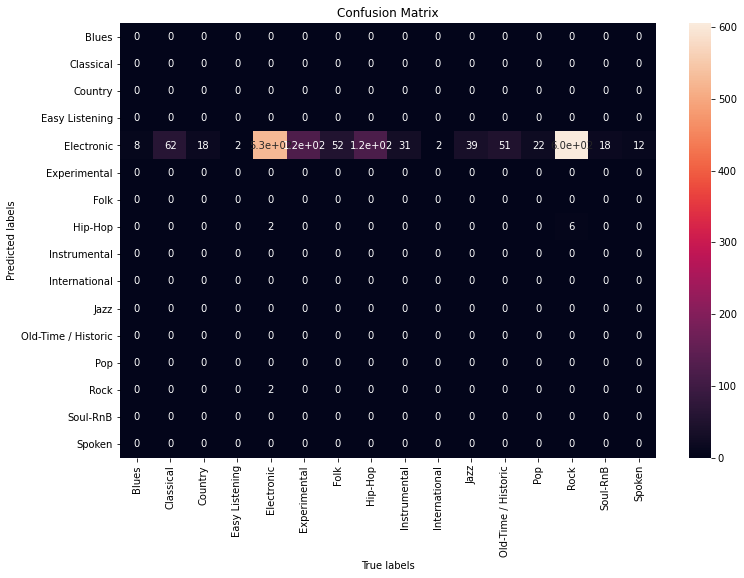

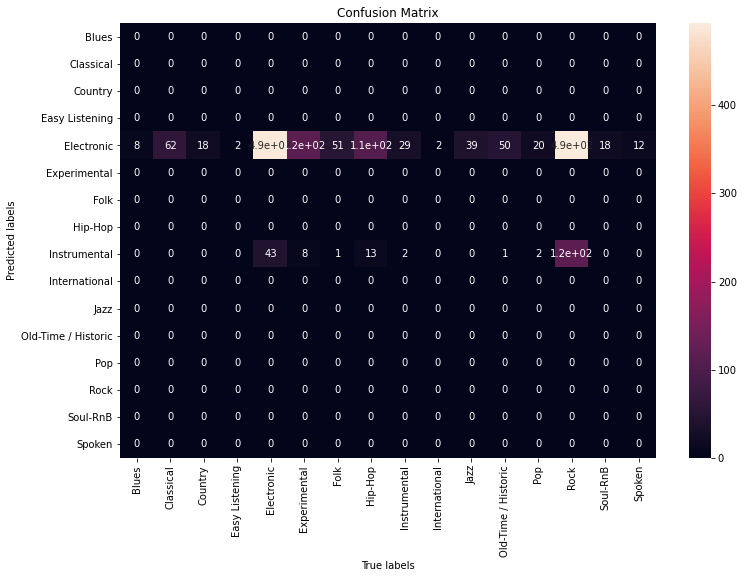

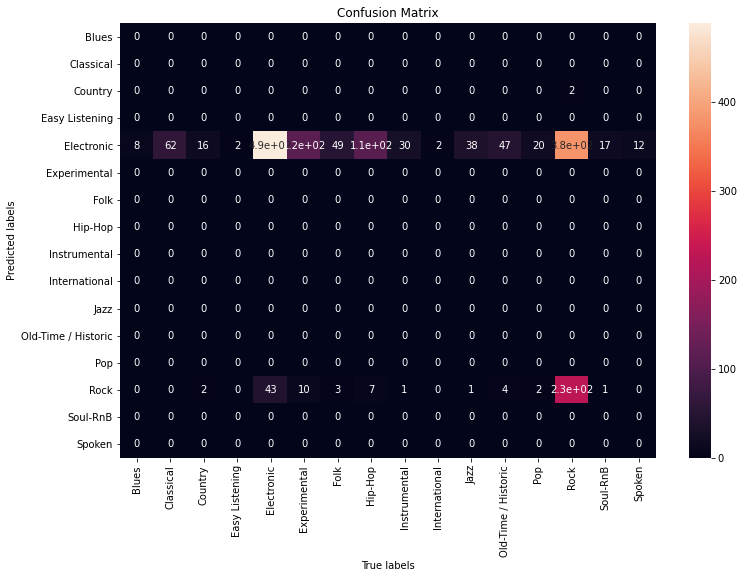

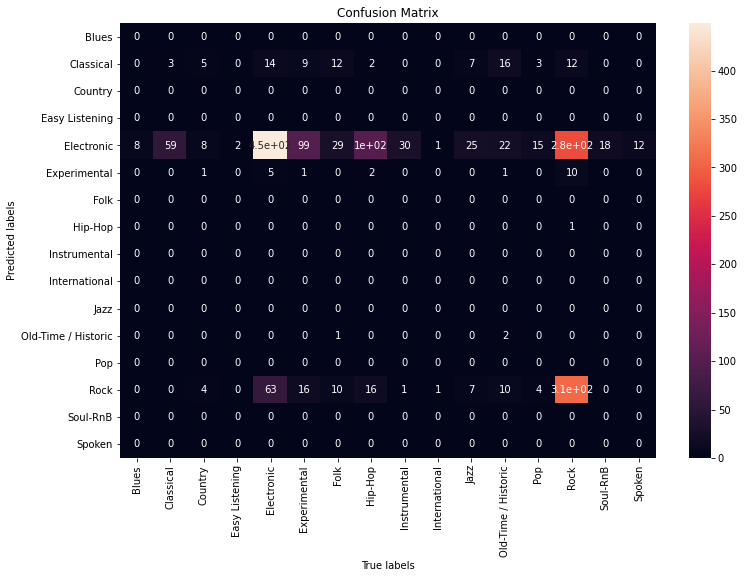

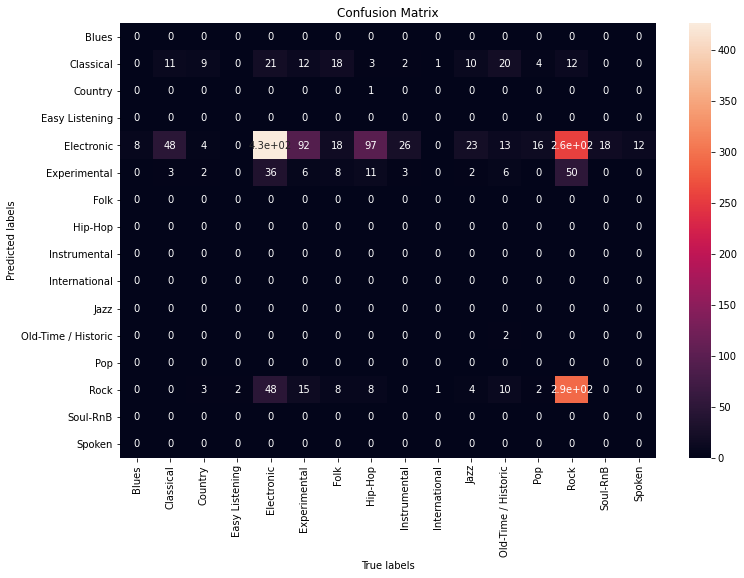

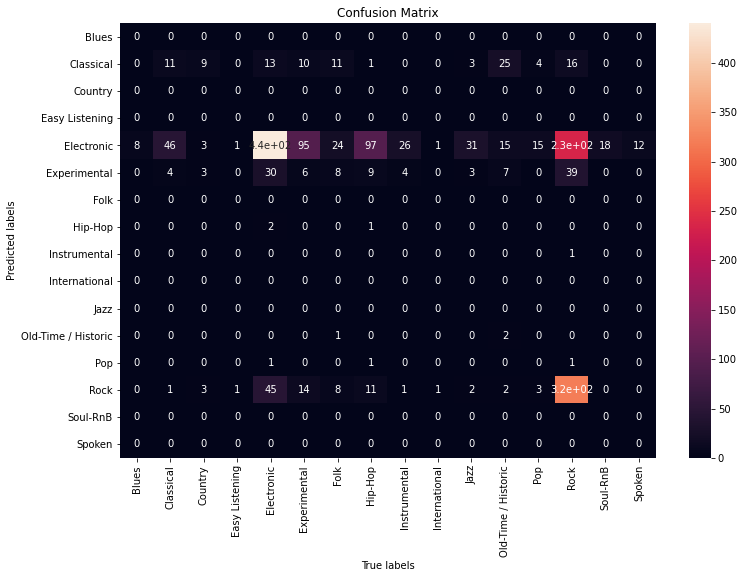

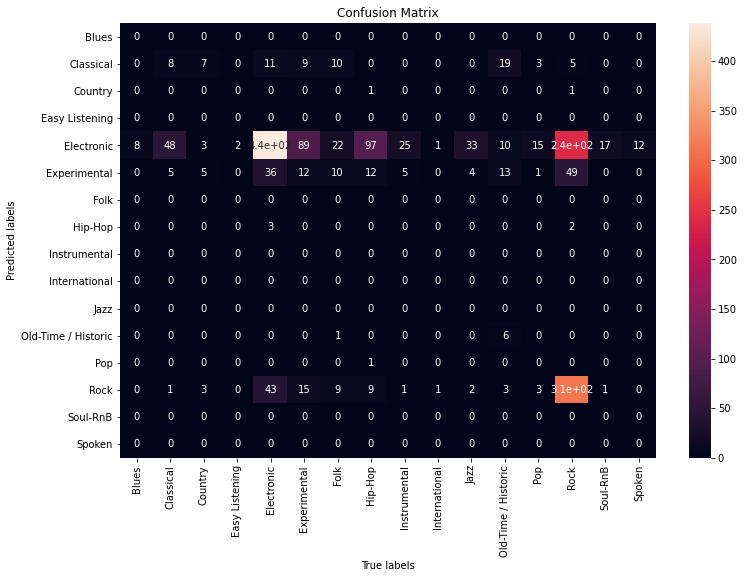

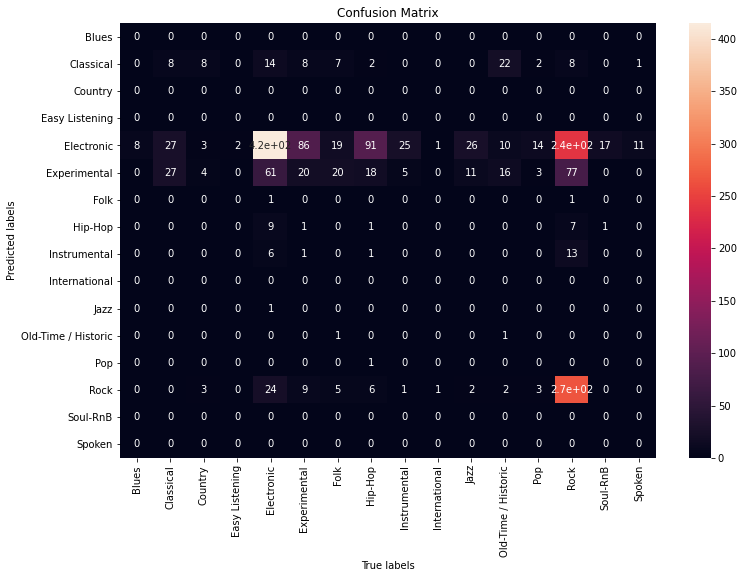

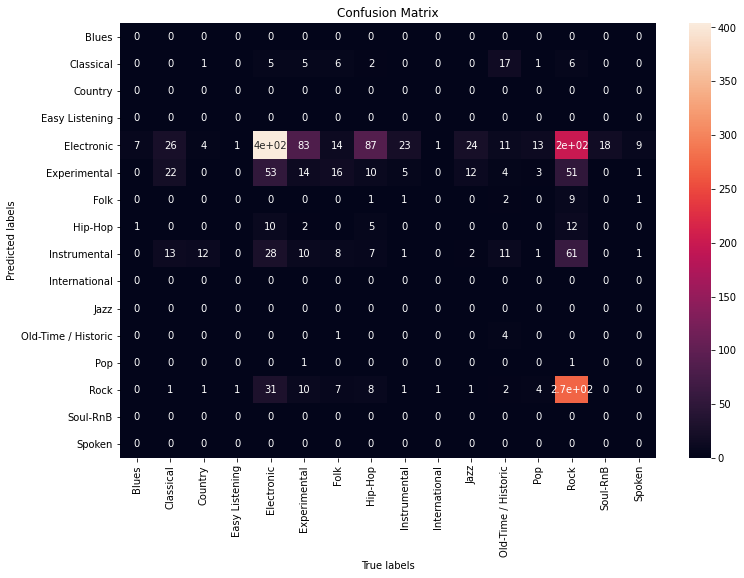

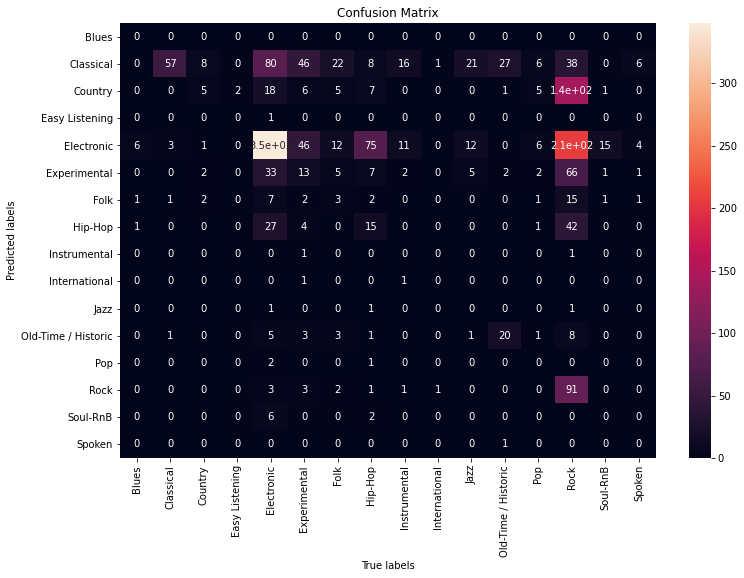

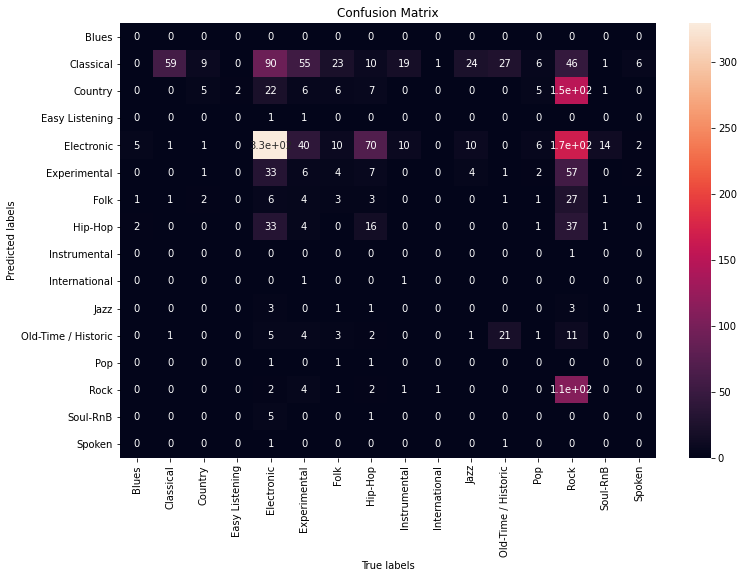

In [59]:
for eval_idx in range(len(evals)):
    y_true, y_pred = evals[eval_idx]
    cm = confusion_matrix(y_true, y_pred).T
    prec = [cm[i, i] / cm[i, :].sum() for i in range(cm.shape[0])]
    rec = [cm[i, i] / cm[:, i].sum() for i in range(cm.shape[0])]
    
    if eval_idx % 10 == 0:
        show_validation(cm, data_val.genres)

In [60]:
data_val.genres

['Blues',
 'Classical',
 'Country',
 'Easy Listening',
 'Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Jazz',
 'Old-Time / Historic',
 'Pop',
 'Rock',
 'Soul-RnB',
 'Spoken']

In [61]:
data_val.class_distribution

{'Blues': 8,
 'Classical': 62,
 'Country': 18,
 'Easy Listening': 2,
 'Electronic': 531,
 'Experimental': 125,
 'Folk': 52,
 'Hip-Hop': 120,
 'Instrumental': 31,
 'International': 2,
 'Jazz': 39,
 'Old-Time / Historic': 51,
 'Pop': 22,
 'Rock': 611,
 'Soul-RnB': 18,
 'Spoken': 12}

In [5]:
models

['models/restorchism24_medium_weighted_00_2020-09-01.pt',
 'models/restorchism24_medium_weighted_01_2020-09-01.pt',
 'models/restorchism24_medium_weighted_02_2020-09-01.pt',
 'models/restorchism24_medium_weighted_03_2020-09-01.pt',
 'models/restorchism24_medium_weighted_04_2020-09-01.pt',
 'models/restorchism24_medium_weighted_05_2020-09-01.pt',
 'models/restorchism24_medium_weighted_06_2020-09-01.pt',
 'models/restorchism24_medium_weighted_07_2020-09-01.pt',
 'models/restorchism24_medium_weighted_08_2020-09-01.pt',
 'models/restorchism24_medium_weighted_09_2020-09-01.pt',
 'models/restorchism24_medium_weighted_100_2020-09-06.pt',
 'models/restorchism24_medium_weighted_10_2020-09-01.pt',
 'models/restorchism24_medium_weighted_11_2020-09-01.pt',
 'models/restorchism24_medium_weighted_12_2020-09-01.pt',
 'models/restorchism24_medium_weighted_13_2020-09-01.pt',
 'models/restorchism24_medium_weighted_14_2020-09-01.pt',
 'models/restorchism24_medium_weighted_15_2020-09-01.pt',
 'models/rest

In [146]:
model_prefix = 'restorchism18_medium_weighted_19_2020'

In [147]:
models_root = 'models'
losses = sorted([os.path.join(models_root, model_path) for model_path in os.listdir(models_root) if model_path.startswith(model_prefix) and model_path.endswith('.csv')])

In [148]:
losses

['models/restorchism18_medium_weighted_19_2020-09-01-cont.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont10.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont11.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont12.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont2.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont3.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont4.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont5.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont6.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont7.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont8.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont9.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01.csv']

In [127]:
def swap(i, j):
    tmp = losses[i]
    losses[i] = losses[j]
    losses[j] = tmp

In [128]:
for i in range(1, 9):
    swap(i, i+3)
    
for i in reversed(range(1, len(losses))):
    swap(i, i-1)

In [129]:
losses

['models/restorchism18_medium_weighted_19_2020-09-01.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont2.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont3.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont4.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont5.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont6.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont7.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont8.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont9.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont12.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont10.csv',
 'models/restorchism18_medium_weighted_19_2020-09-01-cont11.csv']

In [130]:
pd.read_csv(losses[0])

iteration  loss_train  loss_val
0            0.0    0.398817  0.000000
1            1.0    4.012349  0.000000
2            2.0    1.963912  0.000000
3            3.0    0.159437  0.000000
4            4.0    0.179217  0.000000
...          ...         ...       ...
33775    33775.0    0.320859  0.000000
33776    33776.0    0.126788  0.000000
33777    33777.0    0.333864  0.000000
33778    33778.0    0.425901  0.000000
33779    33779.0    0.384094  0.279881

[33780 rows x 3 columns]

In [132]:
loss_df = pd.read_csv(losses[0])
last_max = loss_df['iteration'][loss_df.shape[0]-1]+1
for i in range(1, len(losses)):
    loss_i = pd.read_csv(losses[i])
    last_max = loss_df['iteration'][loss_df.shape[0]-1]+1
    loss_i['iteration'] += last_max
    loss_df = pd.concat([loss_df, loss_i], ignore_index=True)
    
loss_df['epoch'] = loss_df['iteration'] // 1689 # 1689 is the number of batches in one iteration over dataset

In [133]:
loss_df.loc[loss_df['loss_val'] == 0, 'loss_val'] = np.nan

In [134]:
loss_df['iteration'] = loss_df['iteration'].astype(int)
loss_df['epoch'] = loss_df['epoch'].astype(int)

In [123]:
loss_df

iteration  loss_train  loss_val  epoch
0               0    0.398817       NaN      0
1               1    4.012349       NaN      0
2               2    1.963912       NaN      0
3               3    0.159437       NaN      0
4               4    0.179217       NaN      0
...           ...         ...       ...    ...
167206     167206    0.114357       NaN     98
167207     167207    0.341717       NaN     98
167208     167208    0.335080       NaN     98
167209     167209    0.156724       NaN     98
167210     167210    0.193815  0.261157     98

[167211 rows x 4 columns]

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

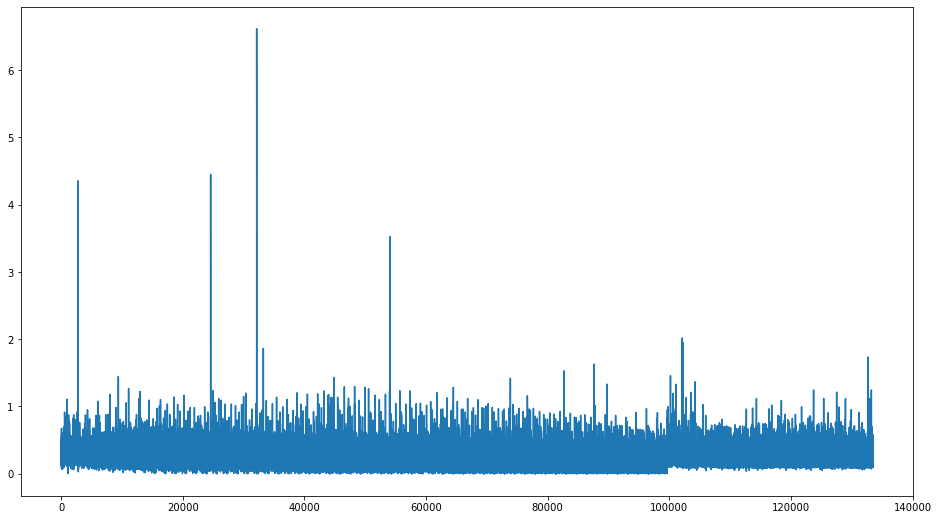

In [60]:
plt.figure(figsize=(16,9))
plt.plot(loss_df['iteration'], loss_df['loss_train'])
plt.show()

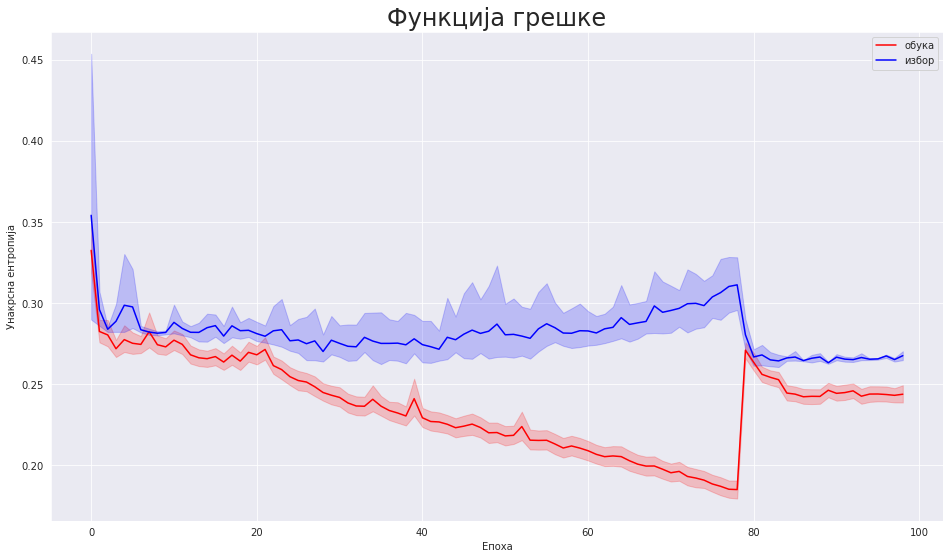

In [150]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(16,9))
    sns.lineplot(data=loss_df, x='epoch', y='loss_train', label='обука', color='red')
    sns.lineplot(data=loss_df, x='epoch', y='loss_val', label='избор', color='blue')
    plt.xlabel('Епоха')
    plt.ylabel('Унакрсна ентропија')
    plt.title('Функција грешке', fontsize=24)

In [140]:
from Datasets import FMAWav

data_train = FMAWav('medium', 'training')
data_val = FMAWav('medium', 'validation')
data_test = FMAWav('medium', 'test')

In [137]:
print(len(data_train))
print(len(data_val))
print(len(data_test))

13512
1704
1772


In [97]:
loss_df['iteration'] // 1689

0          0
1          0
2          0
3          0
4          0
          ..
167206    98
167207    98
167208    98
167209    98
167210    98
Name: iteration, Length: 167211, dtype: int64

In [141]:
data_train.ground_truth

AttributeError: 'FMAWav' object has no attribute 'ground_truth'

In [ ]:
sns.distplot()

In [62]:
evals

{0: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 1: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 2: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 3: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 4: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 5: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 6: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 7: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 8: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 9: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 100: (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([13.,  1.,  4., ...,  4.,  1.,  4.])),
 1

In [63]:
model_evals

{'models/restorchism24_medium_weighted_00_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_01_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_02_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_03_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_04_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_05_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4., 4.])),
 'models/restorchism24_medium_weighted_06_2020-09-01.pt': (array([13.,  7.,  7., ...,  4.,  4.,  4.]),
  array([4., 4., 4., ..., 4., 4.,

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
accuracy_score(*model_evals['models/restorchism24_medium_weighted_00_2020-09-01.pt'])

0.30927230046948356

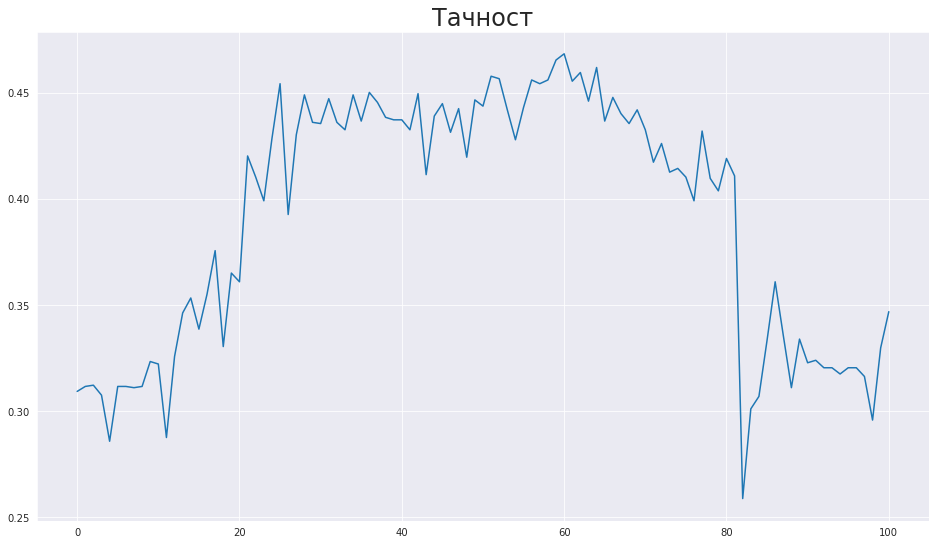

In [79]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(16,9))
    plt.title('Тачност', fontsize=24)
    sns.lineplot(data=np.array([accuracy_score(*model_evals[model_eval]) for model_eval in list(model_evals.keys())]))

/home/ustegic/.anaconda3/envs/torchism2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


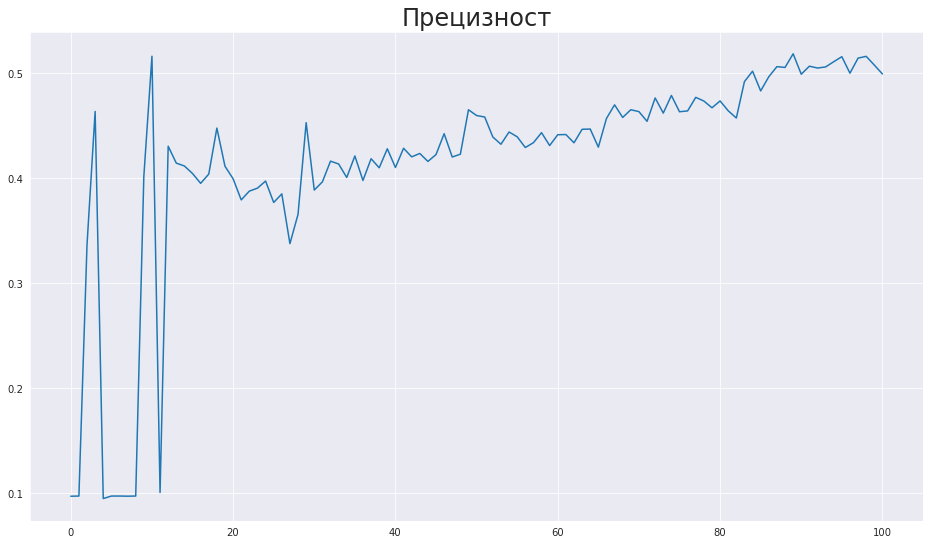

In [87]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(16,9))
    plt.title('Прецизност', fontsize=24)
    sns.lineplot(data=np.array([precision_score(*model_evals[model_eval], average='weighted') for model_eval in list(model_evals.keys())]))

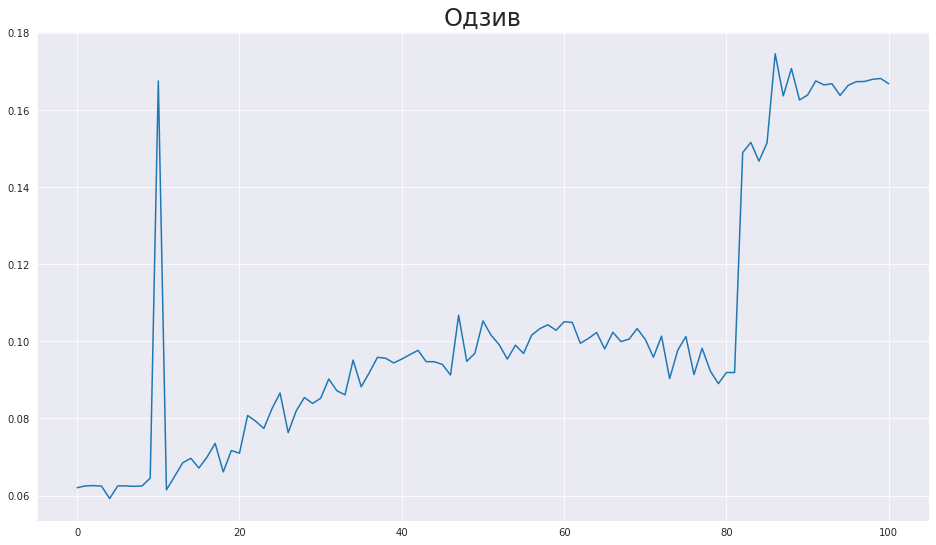

In [95]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(16,9))
    plt.title('Одзив', fontsize=24)
    sns.lineplot(data=np.array([recall_score(*model_evals[model_eval], average='macro') for model_eval in list(model_evals.keys())]))